In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the csv dataset as Pandas Dataframe

In [10]:
df=pd.read_csv('data/StudentsPerformance.csv')

Viewing Top 5 Records

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1.Performing Data Checks

1.a)Checking Missing Values

In [ ]:
df.isnull().sum()   ##there is NO missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

1.b)Checking Duplicates

In [17]:
df.duplicated().sum()  ##no duplicate valuues in the datasets

0

1.c) Checking the no.of unique values in the each columns

In [18]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

1.d) Checking the statistics of our dataset

In [ ]:
df.describe()   ##it will be performed on int/float columns only

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight from above steps:
1) From above description of numerical data,all means are between 66 to 68 i.e very close to each other.
2) All standard deviation is very close.
3) Min score for maths=0,Min  score for reading score is 17 and min score for writing score  10.

2 ) Exploring the data

In [38]:
df.info()   ##it will give the information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
print("Cateogries in 'gender' columns" ,end=" ")
print(df['gender'].unique())

print("Cateogries in 'race/ethnicity' columns" ,end=" ")
print(df['race/ethnicity'].unique())

print("Cateogries in 'parental level of education' columns" ,end=" ")
print(df['parental level of education'].unique())

print("Cateogries in 'lunch' columns" ,end=" ")
print(df['lunch'].unique())

print("Cateogries in 'test preparation course' columns" ,end=" ")
print(df['test preparation course'].unique())

Cateogries in 'gender' columns ['female' 'male']
Cateogries in 'race/ethnicity' columns ['group B' 'group C' 'group A' 'group D' 'group E']
Cateogries in 'parental level of education' columns ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Cateogries in 'lunch' columns ['standard' 'free/reduced']
Cateogries in 'test preparation course' columns ['none' 'completed']


In [39]:
#defining numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype !='object']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='object']

In [40]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [41]:
##printing columns
print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical_features  : {}".format(len(categorical_features ),categorical_features ))

we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical_features  : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Adding columns for total scores and avg score

In [42]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['avg_score']=df['total_score']/3

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
reading_full_marks=df[df['reading score']==100]['avg_score'].count()
writing_full_marks=df[df['writing score']==100]['avg_score'].count()
math_full_marks=df[df['math score']==100]['avg_score'].count()

print(f'No.of students with full marks in reading :{reading_full_marks}')
print(f'No.of students with full marks in math :{math_full_marks}')
print(f'No.of students with full marks in writing :{writing_full_marks}')

No.of students with full marks in reading :17
No.of students with full marks in math :7
No.of students with full marks in writing :14


In [47]:
reading_less_marks=df[df['reading score']<=20]['avg_score'].count()
writing_less_marks=df[df['writing score']<=20]['avg_score'].count()
math_less_marks=df[df['math score']<=20]['avg_score'].count()

print(f'No.of students with less marks in reading :{reading_less_marks}')
print(f'No.of students with less marks in math :{math_less_marks}')
print(f'No.of students with less marks in writing :{writing_less_marks}')

No.of students with less marks in reading :1
No.of students with less marks in math :4
No.of students with less marks in writing :3


Exploring Data using Visualization

Histogram & kde

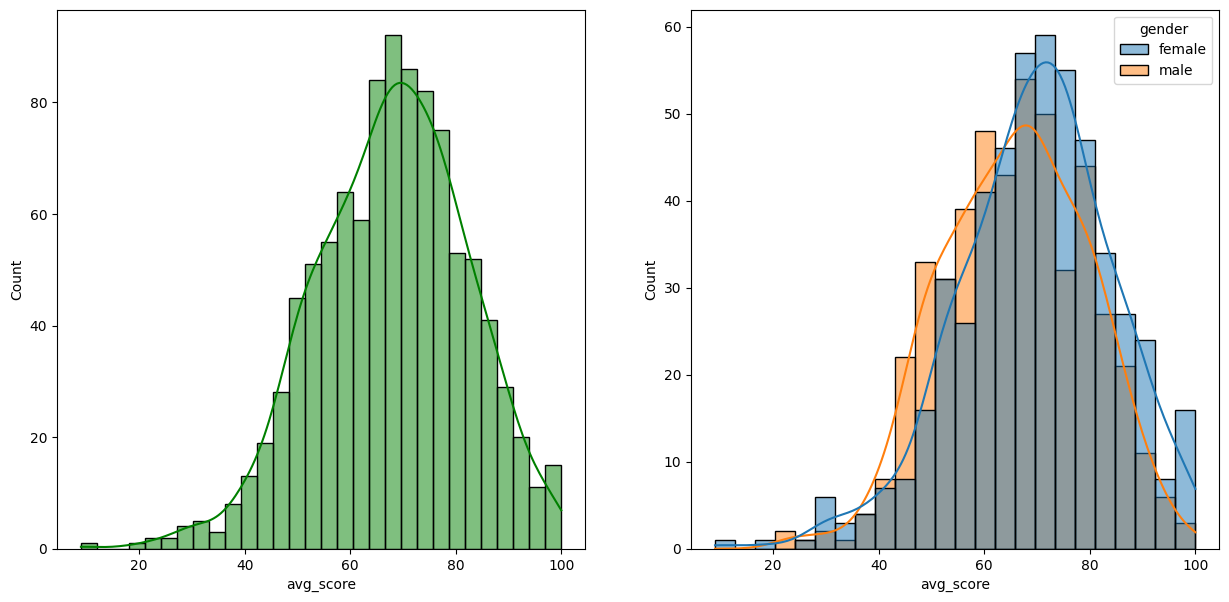

In [48]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

Insights : Female students is performing well then male students

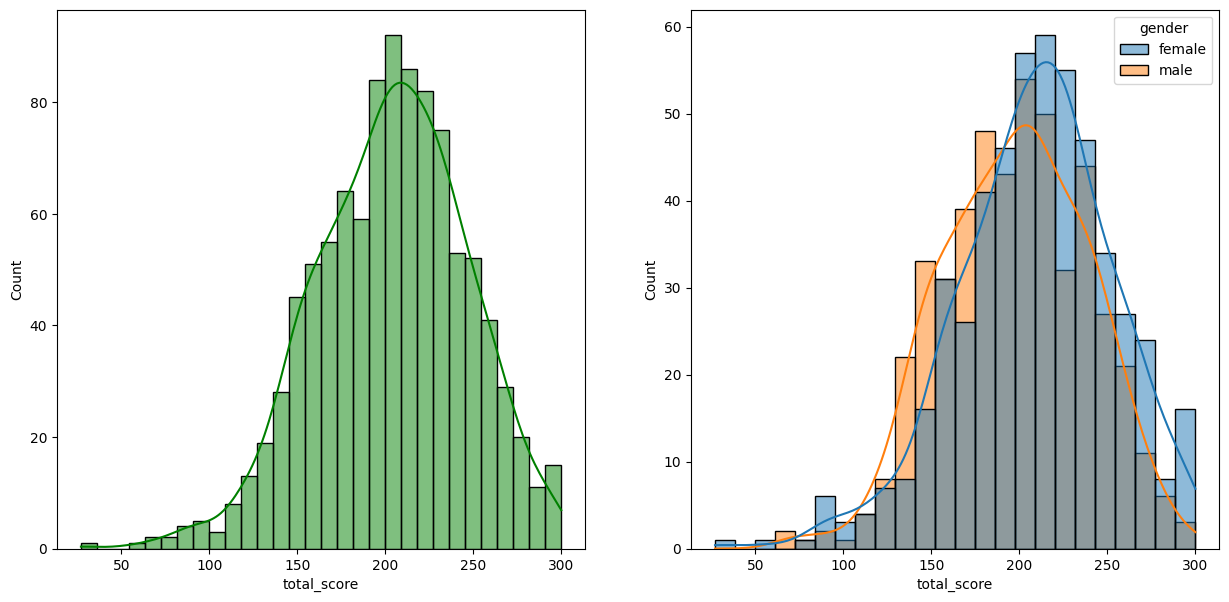

In [49]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

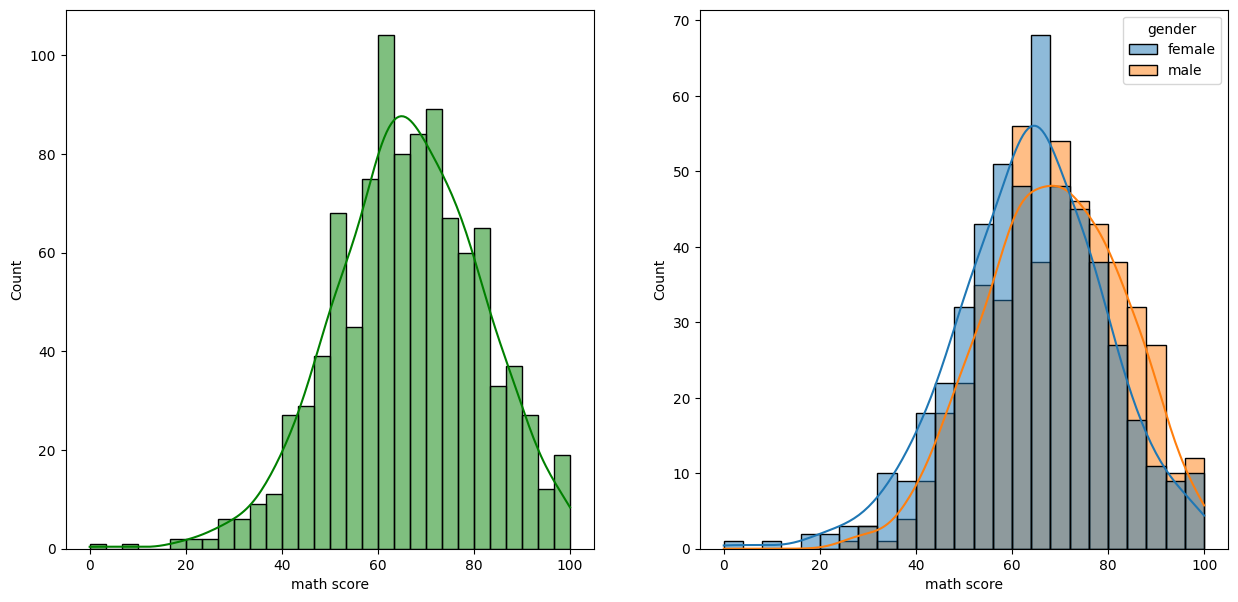

In [51]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='math score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='math score',kde=True,hue='gender')
plt.show()

Female students are performing well in maths also.

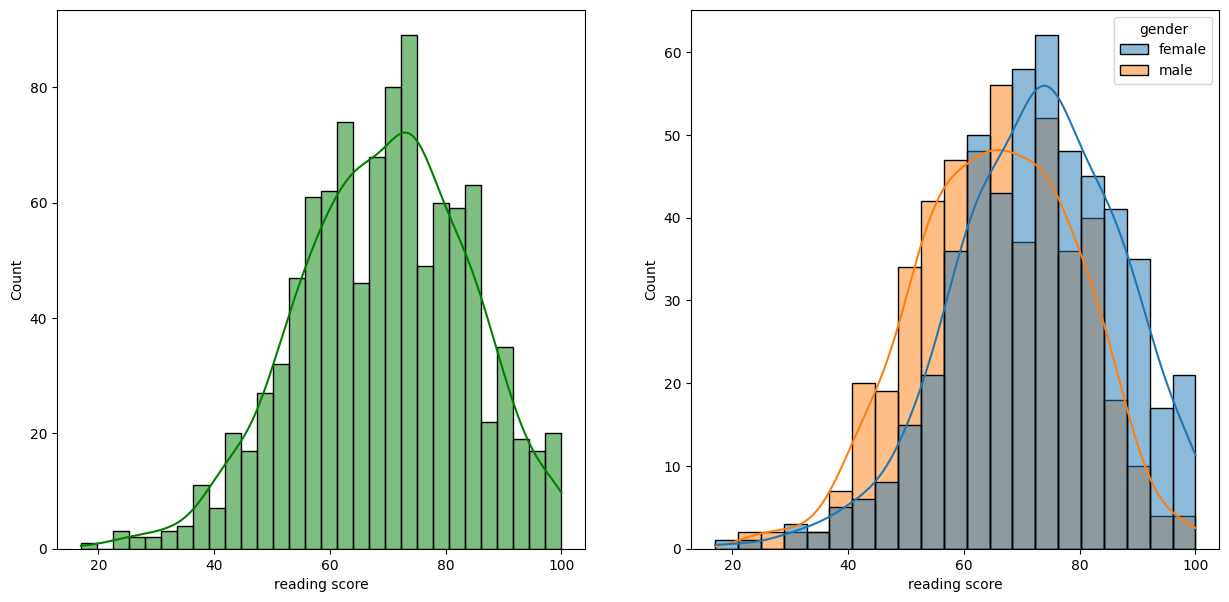

In [52]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='reading score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='reading score',kde=True,hue='gender')
plt.show()

Female are also ahead in reading...

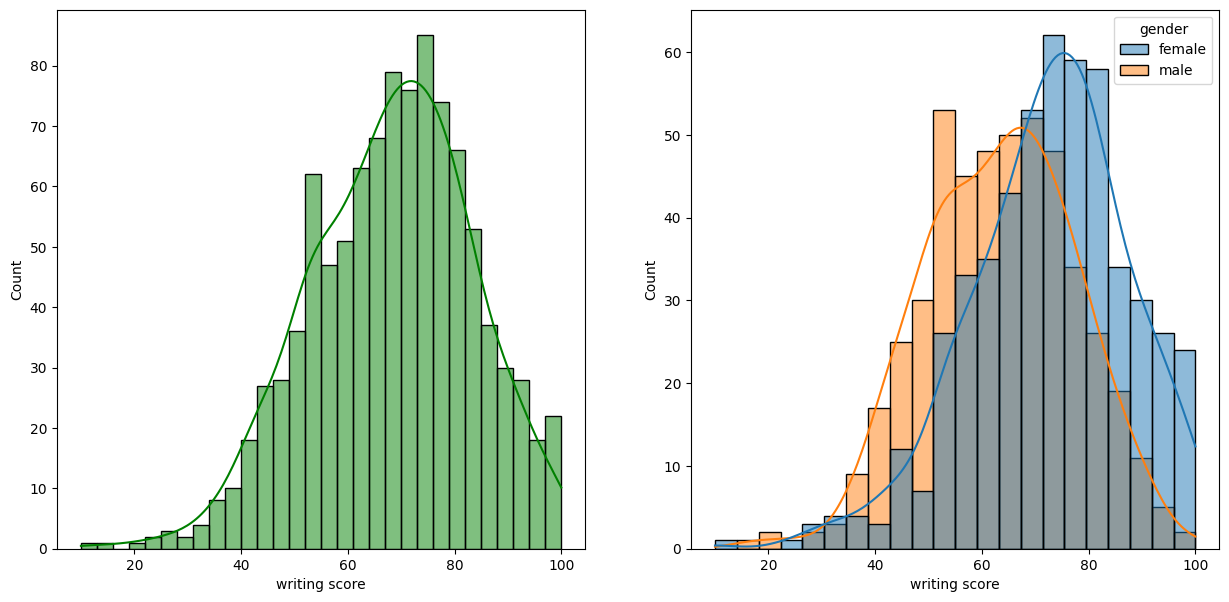

In [55]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='writing score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='writing score',kde=True,hue='gender')
plt.show()

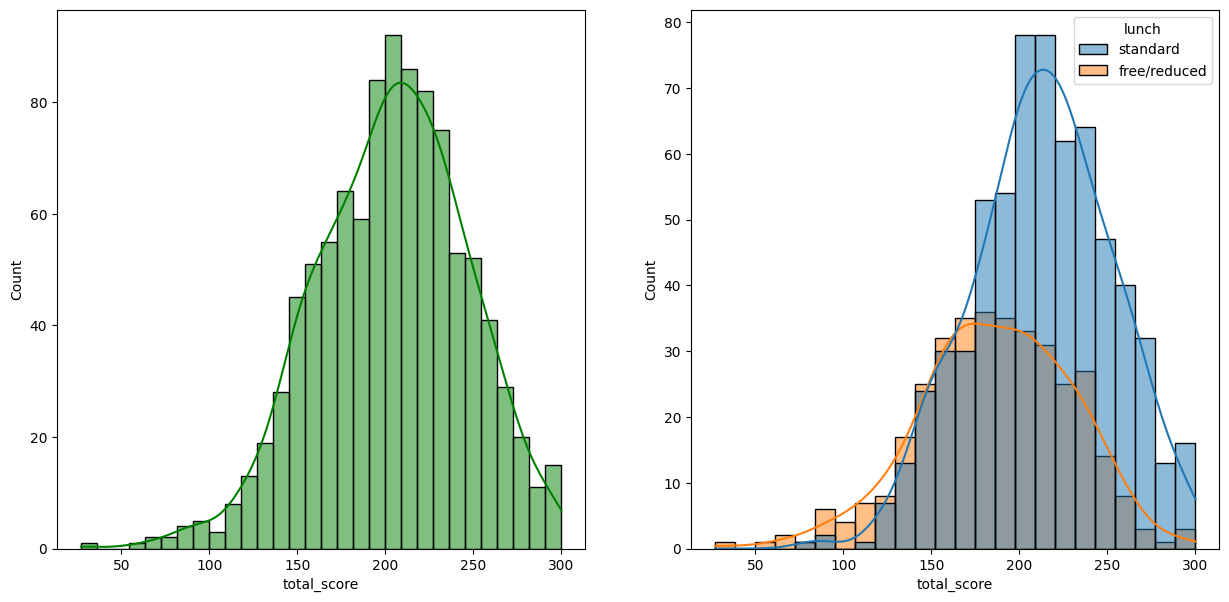

In [50]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',kde=True,hue='lunch')
plt.show()

Standard lunch helps in performing well in exmas.
Standard lunch helps perform well in exmas be it male or female.

In writing as well Female student are ahead.

SO Insights cane be drwan that :
1) Female students are ahead in all courses.
2) Male students needs to be motiavted in order to compete.
3) Different schemes should be drwan to make competiton tougher.
4) For consistancy ,female students should be rewarded.
5) and many more insights can be drwan based on our problem statements.

Checking parental education impact on Exam performance

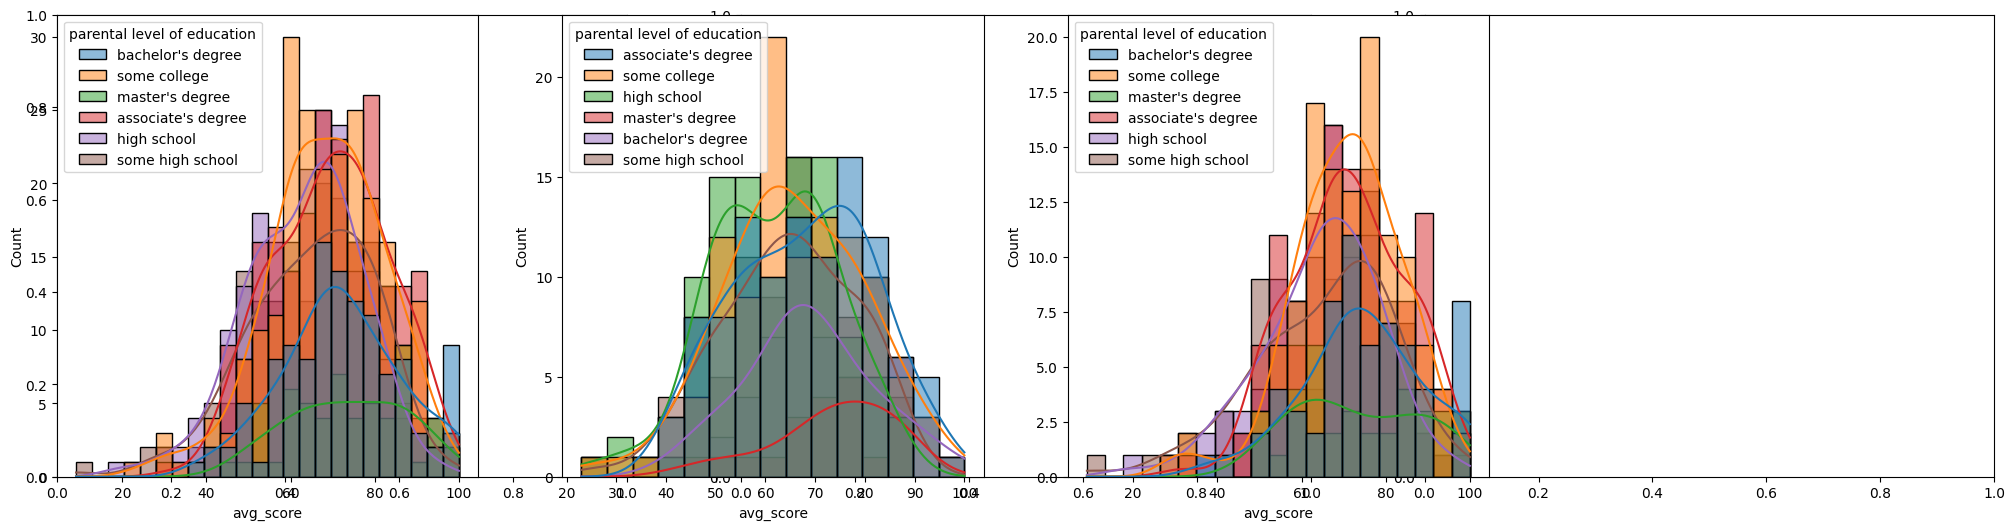

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental level of education')
plt.show()

Insights:
In general parent's education don't help student perform well in exam.

checking exam's perforamce on basis of race and ethinicity


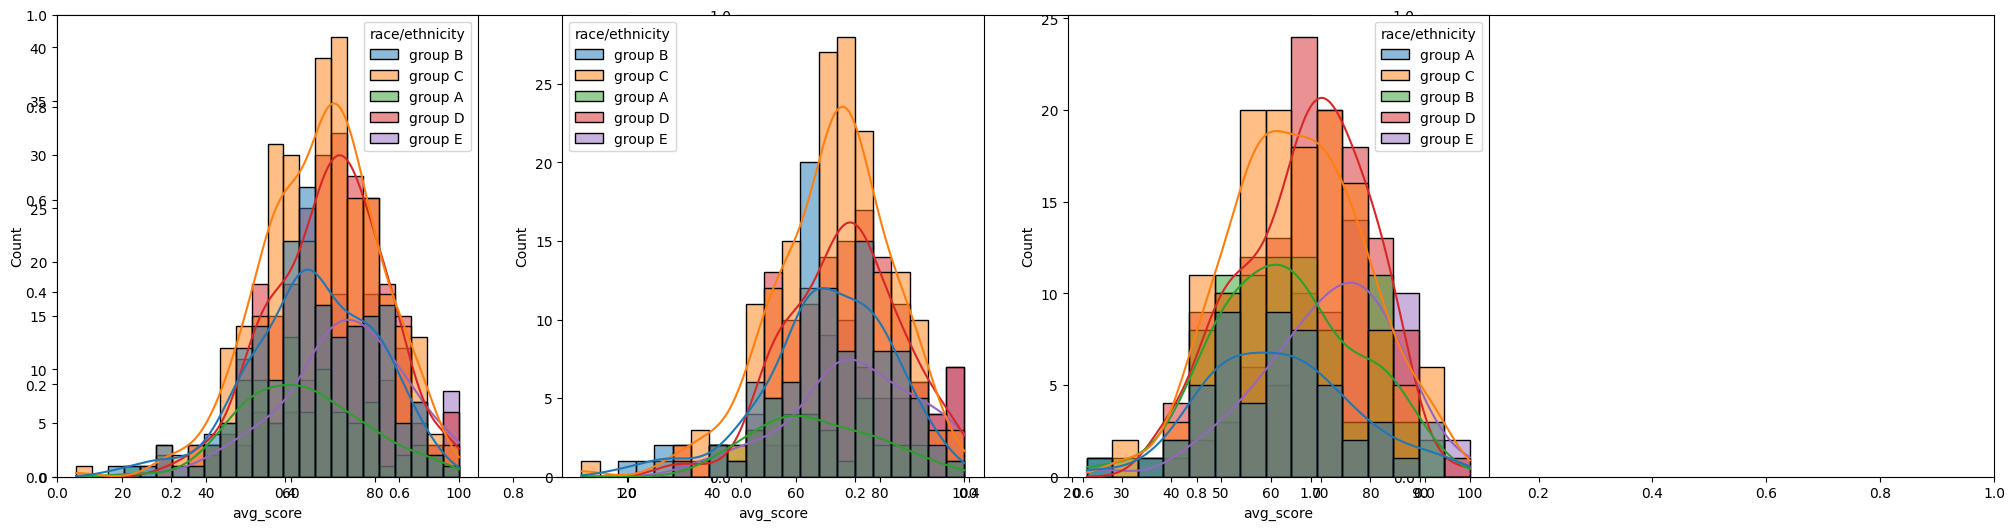

In [62]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.show()